<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/ann_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplos de redes neuronales artificiales

## Los datos

En este primer ejemplo, crearemos un clasificador de círculos mediante 4 formas, 3 de ellas con ann y las compararemos con modelos obtenidos por ML, usando:

- TensorFlow

- Keras

- Scikitlearn

1.1. Importamos librerías

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

1.2. Disponemos de datos (en este caso artificiales)

In [2]:
from sklearn.datasets import make_circles

# Creamos dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

In [3]:
X.shape

(500, 2)

In [4]:
Y.shape

(500,)

In [5]:
x = X.T

In [6]:
x.shape

(2, 500)

In [7]:
x[0].shape

(500,)

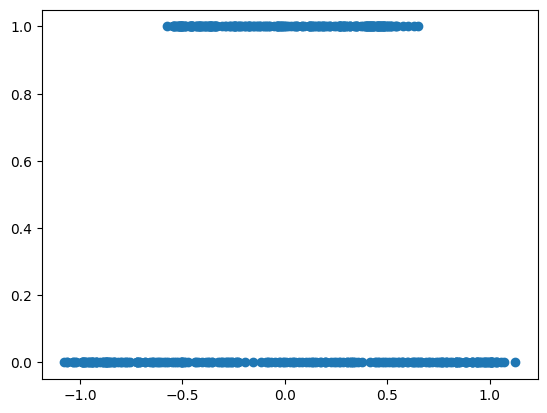

In [8]:
plt.scatter(x[0],Y)

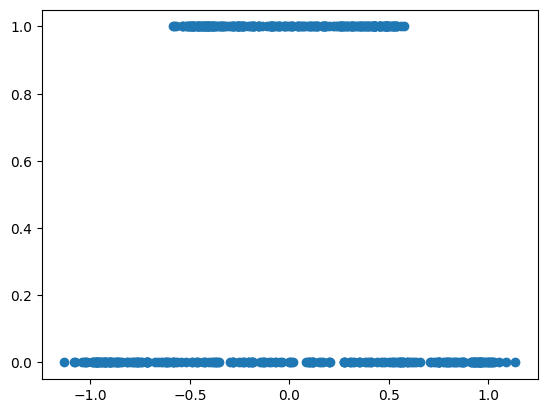

In [9]:
plt.scatter(x[1],Y)

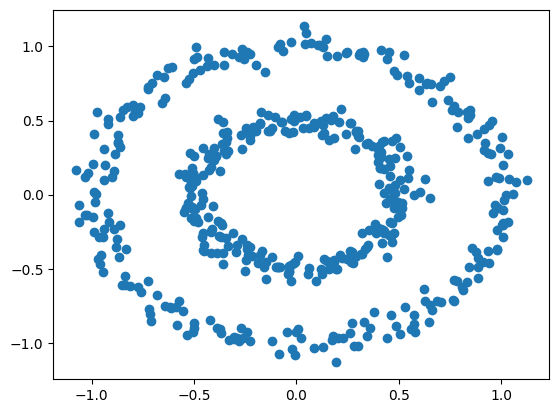

In [10]:
plt.scatter(x[0],x[1])

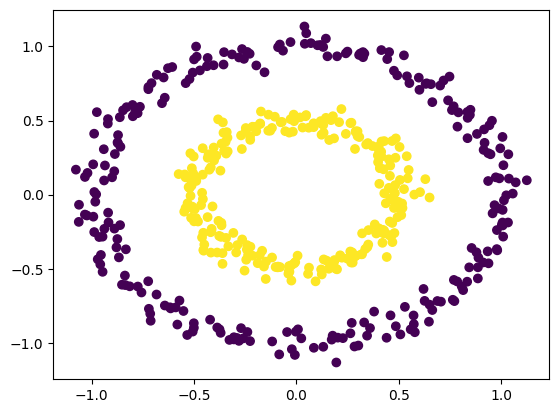

In [11]:
plt.scatter(x=x[0], y=x[1], c=Y)

In [12]:
Y

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

## 1ra forma: Tensorflow

In [13]:
x[0].dtype

dtype('float64')

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

datosX = tf.placeholder("float", shape=[None, X.shape[1]])
datosY = tf.placeholder("float", shape=[None])

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# Tasa de aprendizaje
lr = 0.01

In [16]:
# Número de neuronas por capa
nn = [2, 16, 8, 1]

### Capa 1

In [17]:
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(datosX, W1), b1))

### Capa 2

In [18]:
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

### Capa 3

In [19]:
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

### Capa 4

In [20]:
# Vector de predicciones de Y.
prediccionY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

### Error

In [21]:
# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(prediccionY, datosY)

### Disminucion del error

In [22]:
# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

In [23]:
with tf.Session() as sess:

  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())

  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):

    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY.
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, prediccionY], feed_dict={ datosX : X, datosY : Y })

    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0:

      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)

      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

      #extra
      res = 100
      _x0 = np.linspace(-1.5, 1.5, res)
      _x1 = np.linspace(-1.5, 1.5, res)
      _pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(prediccionY, feed_dict={ datosX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)

Step 0 / 1000 - Loss =  0.28213015 - Acc = 0.69
Step 25 / 1000 - Loss =  0.22227569 - Acc = 0.79
Step 50 / 1000 - Loss =  0.13271837 - Acc = 0.872
Step 75 / 1000 - Loss =  0.07014156 - Acc = 0.974
Step 100 / 1000 - Loss =  0.05390955 - Acc = 0.98
Step 125 / 1000 - Loss =  0.04481846 - Acc = 0.982
Step 150 / 1000 - Loss =  0.03833305 - Acc = 0.99
Step 175 / 1000 - Loss =  0.033570703 - Acc = 0.99
Step 200 / 1000 - Loss =  0.029635465 - Acc = 0.992
Step 225 / 1000 - Loss =  0.026254725 - Acc = 0.998
Step 250 / 1000 - Loss =  0.023463788 - Acc = 1.0
Step 275 / 1000 - Loss =  0.021142732 - Acc = 1.0
Step 300 / 1000 - Loss =  0.019188544 - Acc = 1.0
Step 325 / 1000 - Loss =  0.017535545 - Acc = 1.0
Step 350 / 1000 - Loss =  0.01612268 - Acc = 1.0
Step 375 / 1000 - Loss =  0.014886829 - Acc = 1.0
Step 400 / 1000 - Loss =  0.013792252 - Acc = 1.0
Step 425 / 1000 - Loss =  0.0128405 - Acc = 1.0
Step 450 / 1000 - Loss =  0.011993125 - Acc = 1.0
Step 475 / 1000 - Loss =  0.011234071 - Acc = 1.0


------


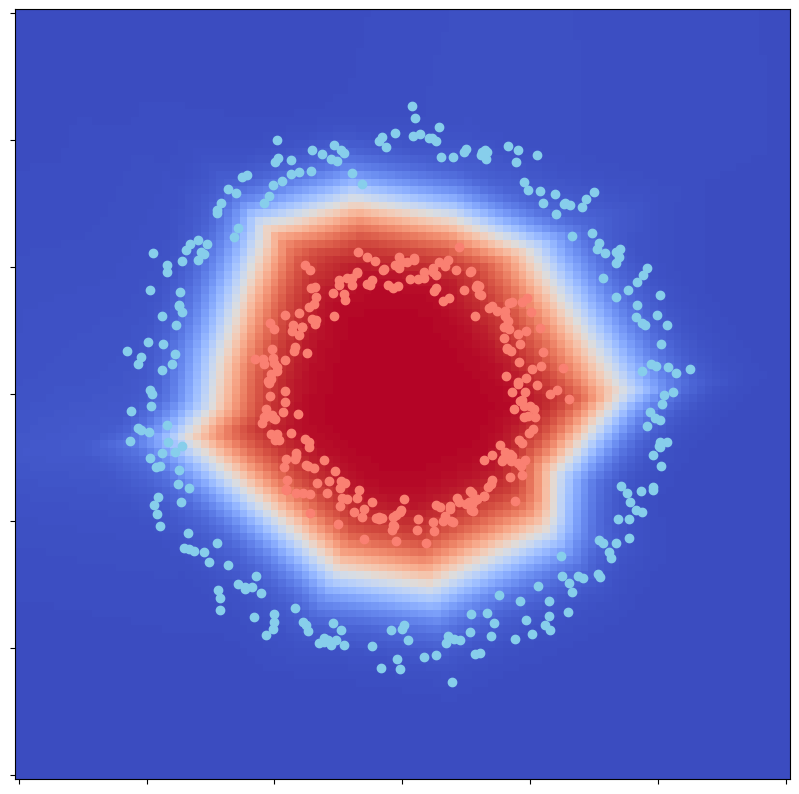

In [24]:
from matplotlib import animation
from IPython.core.display import display, HTML

ims = []

fig = plt.figure(figsize=(10, 10))

print("------")

for fr in range(len(iPY)):

  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

#### extra

In [25]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from sklearn.datasets import make_circles

# Generar datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Convertir las etiquetas a un formato adecuado para la red neuronal
Y = Y.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20 split)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Definir hiperparámetros
learning_rate = 0.01
n_epochs = 1000
n_input = 2
n_hidden_1 = 16
n_hidden_2 = 8
n_output = 1

# Definir placeholders para los datos de entrada y salida
X_placeholder = tf.placeholder(tf.float32, [None, n_input])
Y_placeholder = tf.placeholder(tf.float32, [None, n_output])

# Definir pesos y sesgos para las capas ocultas
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

# Definir la arquitectura de la red neuronal
def neural_network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construir el modelo
logits = neural_network(X_placeholder)

# Definir la función de pérdida
loss = tf.reduce_mean(tf.square(logits - Y_placeholder))

# Definir el optimizador
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# Inicializar las variables
init = tf.global_variables_initializer()

# Entrenar el modelo
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        _, curr_loss = sess.run([train_op, loss], feed_dict={X_placeholder: X_train, Y_placeholder: Y_train})
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {curr_loss}')

    # Calcular la precisión en el conjunto de prueba
    predicted_labels = tf.round(tf.sigmoid(logits))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, Y_placeholder), tf.float32))
    test_accuracy = accuracy.eval({X_placeholder: X_test, Y_placeholder: Y_test})
    print(f'Test Accuracy: {test_accuracy}')

Epoch: 0, Loss: 75.90336608886719
Epoch: 100, Loss: 0.099771648645401
Epoch: 200, Loss: 0.054034050554037094
Epoch: 300, Loss: 0.035627156496047974
Epoch: 400, Loss: 0.02732928842306137
Epoch: 500, Loss: 0.022249968722462654
Epoch: 600, Loss: 0.018980223685503006
Epoch: 700, Loss: 0.016565334051847458
Epoch: 800, Loss: 0.014956964179873466
Epoch: 900, Loss: 0.013846746645867825
Test Accuracy: 0.6499999761581421


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Generar datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Convertir las etiquetas a un formato adecuado para la red neuronal
Y = Y.reshape(-1, 1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20 split)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Definir hiperparámetros
learning_rate = 0.01
n_epochs = 1000
n_input = 2
n_hidden_1 = 16
n_hidden_2 = 8
n_output = 1

# Definir placeholders para los datos de entrada y salida
X_placeholder = tf.placeholder(tf.float32, [None, n_input])
Y_placeholder = tf.placeholder(tf.float32, [None, n_output])

# Definir pesos y sesgos para las capas ocultas
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

# Definir la arquitectura de la red neuronal
def neural_network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construir el modelo
logits = neural_network(X_placeholder)

# Definir la función de pérdida
loss = tf.reduce_mean(tf.square(logits - Y_placeholder))

# Definir el optimizador
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# Inicializar las variables
init = tf.global_variables_initializer()

# Entrenar el modelo
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        _, curr_loss = sess.run([train_op, loss], feed_dict={X_placeholder: X_train, Y_placeholder: Y_train})
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Loss: {curr_loss}')

    # Hacer predicciones en el conjunto de datos de prueba
    predicted_labels = tf.round(tf.sigmoid(logits))
    predictions = sess.run(predicted_labels, feed_dict={X_placeholder: X_test})

Epoch: 0, Loss: 6.092092514038086
Epoch: 100, Loss: 0.11001311987638474
Epoch: 200, Loss: 0.05814436823129654
Epoch: 300, Loss: 0.04484241083264351
Epoch: 400, Loss: 0.039948366582393646
Epoch: 500, Loss: 0.03659072518348694
Epoch: 600, Loss: 0.03383796662092209
Epoch: 700, Loss: 0.03147285059094429
Epoch: 800, Loss: 0.02933875471353531
Epoch: 900, Loss: 0.027488723397254944


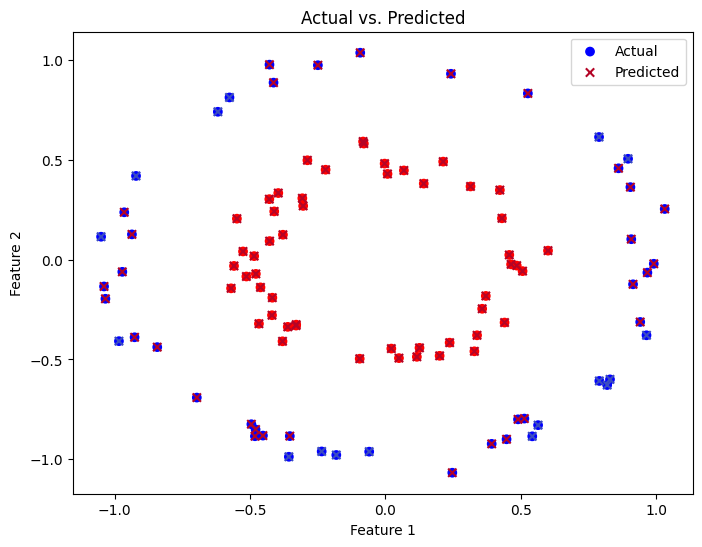

In [27]:
# Graficar los puntos de datos y las predicciones
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test.ravel(), cmap='bwr', marker='o', label='Actual')
# Graficar las predicciones
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions.ravel(), cmap='coolwarm', marker='x', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual vs. Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [28]:
# Calcular la precisión en el conjunto de prueba
accuracy = np.mean(predictions == Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.00%


## 2da forma: Keras

In [29]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Generar datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=250, batch_size=10, verbose=0)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 83.99999737739563%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


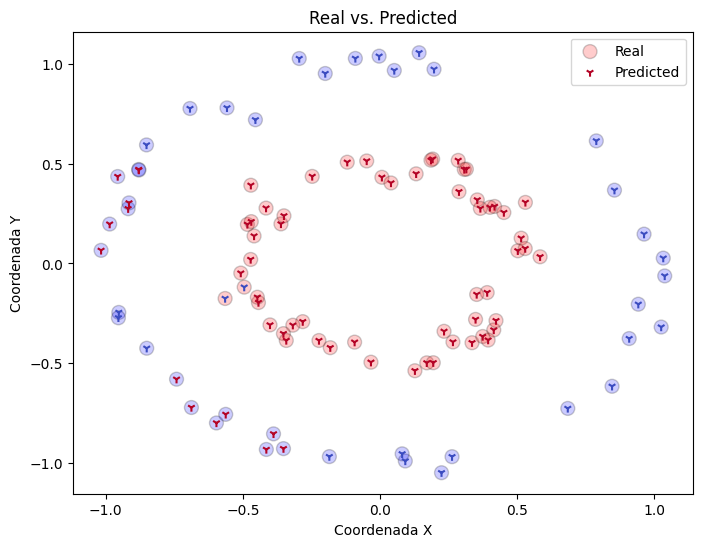

In [30]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de datos de prueba
y_pred = model.predict(X_test)

# Redondear las predicciones a 0 o 1
y_pred = np.round(y_pred).astype(int)

# Graficar los puntos de datos y las predicciones
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='o', label='Real', alpha = 0.2, edgecolors =  "black", s=100) #, linewidths = 5)
# Graficar las predicciones
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='1', label='Predicted')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Real vs. Predicted')
plt.legend() #['Real', 'Predicted'])
plt.show();

## 3ra forma: Scikitlearn

In [31]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 1.91115139
Iteration 2, loss = 0.72743232
Iteration 3, loss = 0.18779417
Iteration 4, loss = 0.13194343
Iteration 5, loss = 0.15467486
Iteration 6, loss = 0.14358908
Iteration 7, loss = 0.12913279
Iteration 8, loss = 0.12476440
Iteration 9, loss = 0.12532241
Iteration 10, loss = 0.12564154
Iteration 11, loss = 0.12526475
Iteration 12, loss = 0.12531595
Iteration 13, loss = 0.12508235
Iteration 14, loss = 0.12511886
Iteration 15, loss = 0.12511300
Iteration 16, loss = 0.12502910
Iteration 17, loss = 0.12510894
Iteration 18, loss = 0.12505817
Iteration 19, loss = 0.12503792
Iteration 20, loss = 0.12504358
Iteration 21, loss = 0.12512020
Iteration 22, loss = 0.12506054
Iteration 23, loss = 0.12502473
Iteration 24, loss = 0.12504358
Iteration 25, loss = 0.12506479
Iteration 26, loss = 0.12502120
Iteration 27, loss = 0.12506966
Iteration 28, loss = 0.12503501
Iteration 29, loss = 0.12503779
Iteration 30, loss = 0.12506472
Iteration 31, loss = 0.12503705
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)

In [32]:
# Calcular la precisión en el conjunto de prueba
accuracy = np.mean(predictions == Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.00%


In [33]:
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir el clasificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 8), learning_rate_init=0.01, max_iter=1000, random_state=42, verbose=1)

# Entrenar el clasificador
mlp_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = mlp_classifier.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Iteration 1, loss = 0.71431953
Iteration 2, loss = 0.69725986
Iteration 3, loss = 0.68244833
Iteration 4, loss = 0.67306974
Iteration 5, loss = 0.66603858
Iteration 6, loss = 0.65978990
Iteration 7, loss = 0.65321742
Iteration 8, loss = 0.64636486
Iteration 9, loss = 0.63897495
Iteration 10, loss = 0.63119010
Iteration 11, loss = 0.62300902
Iteration 12, loss = 0.61482358
Iteration 13, loss = 0.60600876
Iteration 14, loss = 0.59673433
Iteration 15, loss = 0.58666171
Iteration 16, loss = 0.57578173
Iteration 17, loss = 0.56384380
Iteration 18, loss = 0.55097193
Iteration 19, loss = 0.53776180
Iteration 20, loss = 0.52387438
Iteration 21, loss = 0.50936797
Iteration 22, loss = 0.49416864
Iteration 23, loss = 0.47841892
Iteration 24, loss = 0.46183830
Iteration 25, loss = 0.44560131
Iteration 26, loss = 0.42941361
Iteration 27, loss = 0.41308519
Iteration 28, loss = 0.39717640
Iteration 29, loss = 0.38137268
Iteration 30, loss = 0.36486428
Iteration 31, loss = 0.34877599
Iteration 32, los

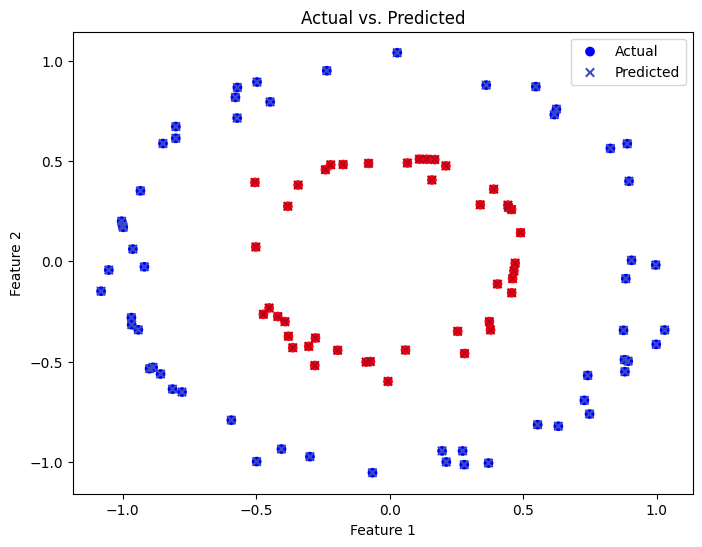

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Generar datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definir el clasificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(16, 8), learning_rate_init=0.01, max_iter=1000, random_state=42)

# Entrenar el clasificador
mlp_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de datos de prueba
y_pred = mlp_classifier.predict(X_test)

# Graficar los puntos de datos y las predicciones
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos reales
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', marker='o', label='Actual')

# Graficar las predicciones
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual vs. Predicted')
plt.legend(['Actual', 'Predicted'])
plt.show()